In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
arianazmoudeh_airbnbopendata_path = kagglehub.dataset_download('arianazmoudeh/airbnbopendata')

print('Data source import complete.')


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('//kaggle/input/airbnbopendata'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

//kaggle/input/airbnbopendata/Airbnb_Open_Data.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data and initial data Info

In [4]:
df=pd.read_csv('//kaggle/input/airbnbopendata/Airbnb_Open_Data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.head()

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.97237  United States           US            False   
1  40.75362 -73.98377  United States           US            False   
2  40.80902 -73.94190  United States           US             True   
3  40.68514 -73.95976  United States           US             True   
4  40.79851 -73.94399  United States           US            False   

  cancellation_policy        room type  Construction year  price service fee  \
0              strict     Private room             2020.0  $966        $193    
1            moderate  Entire home/apt             2007.0  $142         $28    
2            flexible     Private room             2005.0  $620        $124    
3            moderate  Entire home/apt             2005.0  $368         $74    
4            moderate  Entire home/apt             2009.0  $204         $41    

   minimum nights  number of reviews last review  reviews per month  \
0            10.0                9.0  10/19/2021               0.21   
1            30.0               45.0   5/21/2022               0.38   
2             3.0                0.0         NaN                NaN   
3            30.0              270.0    7/5/2019               4.64   
4            10.0                9.0  11/19/2018               0.10   

   review rate number  calculated host listings count  availability 365  \
0                 4.0                             6.0             286.0   
1                 4.0                             2.0             228.0   
2                 5.0                             1.0             352.0   
3                 4.0                             1.0             322.0   
4                 3.0                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN

In [9]:
df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', ''), errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', ''), errors='coerce')

In [10]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [11]:
df['reviews per month'].fillna(0, inplace=True)
df['number of reviews'].fillna(0, inplace=True)

In [12]:
df.drop(['license','house_rules'],axis=1,inplace=True)

In [13]:
df.select_dtypes(include='number').columns

Index(['id', 'host id', 'lat', 'long', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

In [14]:
num_cols=['Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365']

In [15]:
for i in num_cols:
  df[i].fillna(df[i].median(),inplace=True)

In [16]:
df.select_dtypes(exclude='number').columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'last review'],
      dtype='object')

In [17]:
df.dropna(subset=['lat', 'long', 'neighbourhood', 'neighbourhood group'], inplace=True)

In [18]:

cols_to_fill_with_mode = [
    'NAME', 'host_identity_verified', 'host name', 'country',
    'country code', 'instant_bookable', 'cancellation_policy'
]
for col in cols_to_fill_with_mode:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [19]:
from pandas.api.types import is_numeric_dtype

In [20]:
# df.to_csv('cleaned_data.csv',index=False)

#General Overview

## How many listings are there per neighbourhood group (Brooklyn, Manhattan, etc.)?

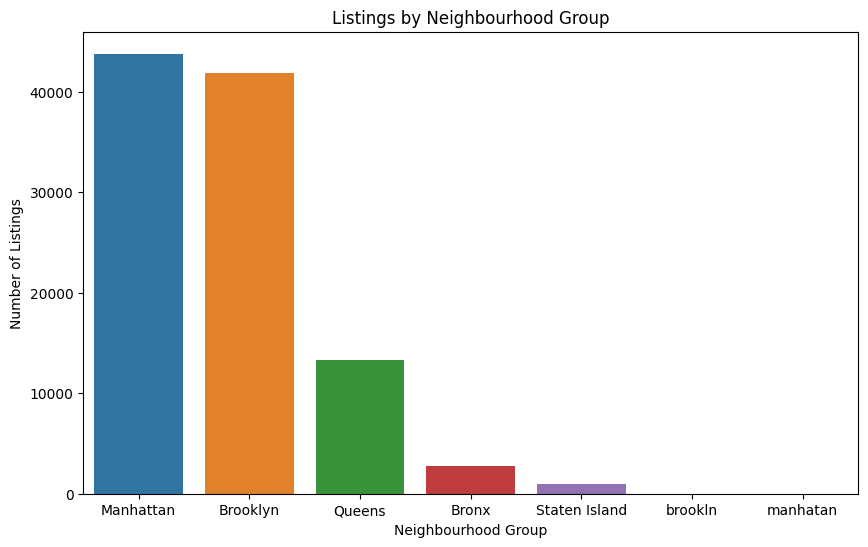

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['neighbourhood group'].value_counts().index,y=df['neighbourhood group'].value_counts().values)
plt.title('Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

Insight: The Airbnb market in this dataset is heavily concentrated in two boroughs: Manhattan and Brooklyn. These two areas contain the vast majority of all listings, establishing them as the primary and most competitive markets. Queens, Bronx, and Staten Island have a significantly smaller market share.

## Which neighbourhoods have the most listings?

In [22]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df['neighbourhood'].value_counts().head(10).index,y=df['neighbourhood'].value_counts().head(10).values)
plt.title('Top 10 Neighbourhoods by Listing Count')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=90)
plt.show()

Insight: Drilling down further, the most saturated micro-markets are Williamsburg, Bedford-Stuyvesant, and Harlem. This indicates where competition among hosts is likely the most intense.

## What is the distribution of room types (Entire home/apt, Private room, etc.)?

In [23]:
plt.figure(figsize=(15, 6))
plt.pie(df['room type'].value_counts().values,labels=df['room type'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Room Types')
plt.show()

Insight: The market's inventory is overwhelmingly standardized. "Entire home/apt" and "Private room" make up over 95% of all available listings. This suggests that "Shared room" and "Hotel room" are very niche offerings.

# Pricing Analysis

## What is the distribution of prices?


Text(0, 0.5, 'Frequency')

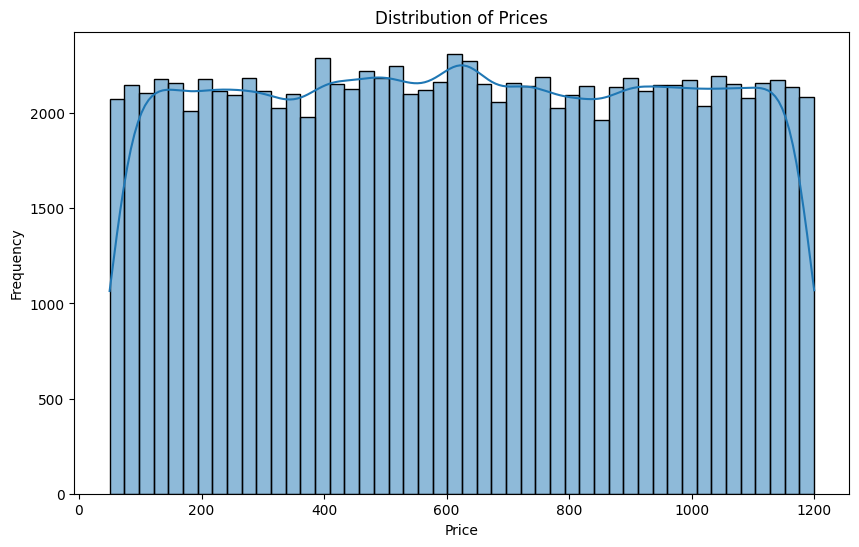

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

## Log Transformed Distribution of Price

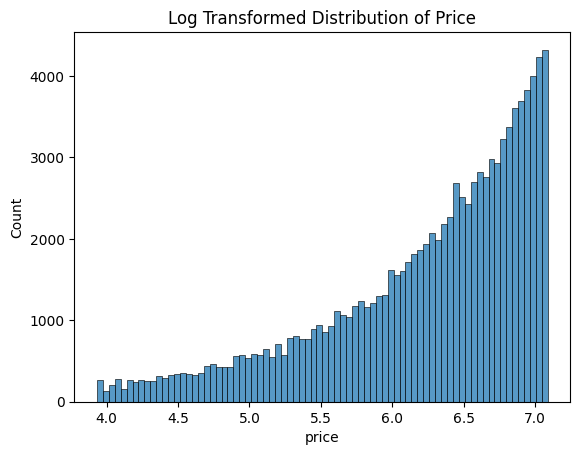

In [25]:

sns.histplot(np.log1p(df['price']))
plt.title('Log Transformed Distribution of Price')
plt.show()

Insight: The initial price histogram shows a strong right skew, meaning most listings are clustered at a lower price point, with a few very expensive outliers. The log-transformed histogram provides a much clearer picture, revealing a more normal distribution around a central price point, which appears to be between $100-$200.

## How do prices differ by neighbourhood group

In [26]:
priceBYneighbourhood = df.groupby('neighbourhood group')['price'].mean().reset_index()

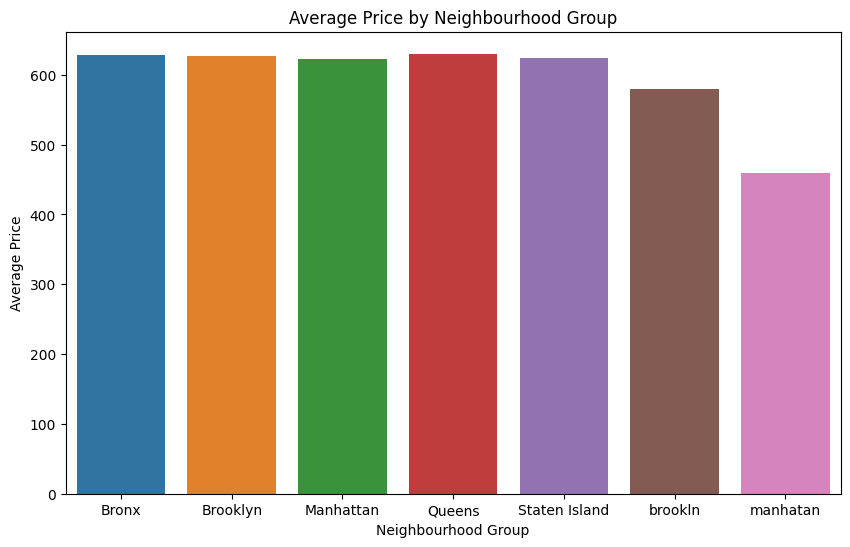

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=priceBYneighbourhood['neighbourhood group'], y=priceBYneighbourhood['price'])
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

Insight: This confirms that price is heavily driven by both location and room type. Manhattan is, on average, the most expensive borough. Within all boroughs, renting an "Entire home/apt" commands a significant price premium over a "Private room" or "Shared room."

## Does room type affect price?

In [28]:
pricwBYroomtype = df.groupby('room type')['price'].mean().reset_index()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

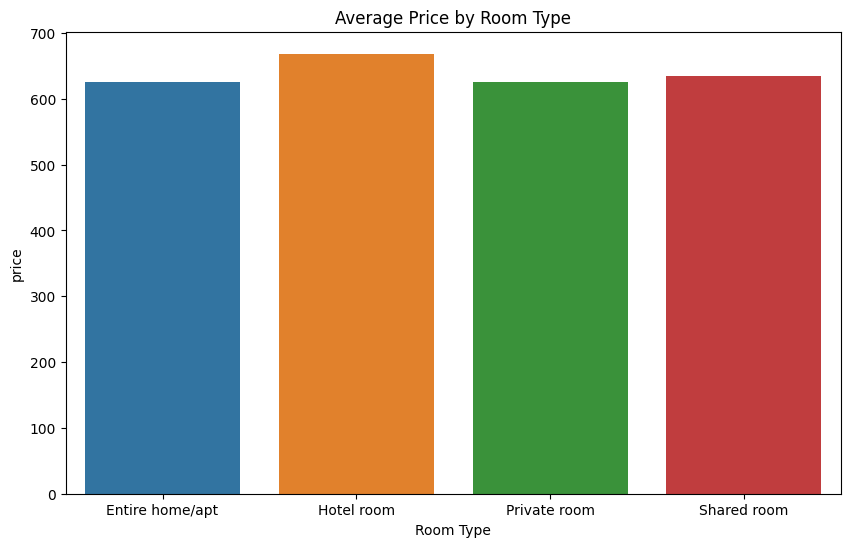

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pricwBYroomtype['room type'], y=pricwBYroomtype['price'])
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt

## Availability & Reviews

## What is the distribution of availability_365?

In [30]:
df = df[df['availability 365'] >= 0]

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability 365'], kde=True)
plt.title('Distribution of Availability')
plt.xlabel('Availability')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

In [32]:
plt.figure(figsize=(10, 6))
sns.boxenplot(df['availability 365'])


<Axes: >

In [33]:
Q1 = df['availability 365'].quantile(0.25)
Q3 = df['availability 365'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filter dataset
df = df[(df['availability 365'] >= lower) & (df['availability 365'] <= upper)]

print("New shape:", df.shape)
print(df['availability 365'].describe())



New shape: (102113, 24)
count    102113.000000
mean        141.508554
std         134.676782
min           0.000000
25%           4.000000
50%          96.000000
75%         269.000000
max         426.000000
Name: availability 365, dtype: float64


<Axes: xlabel='availability 365', ylabel='Count'>

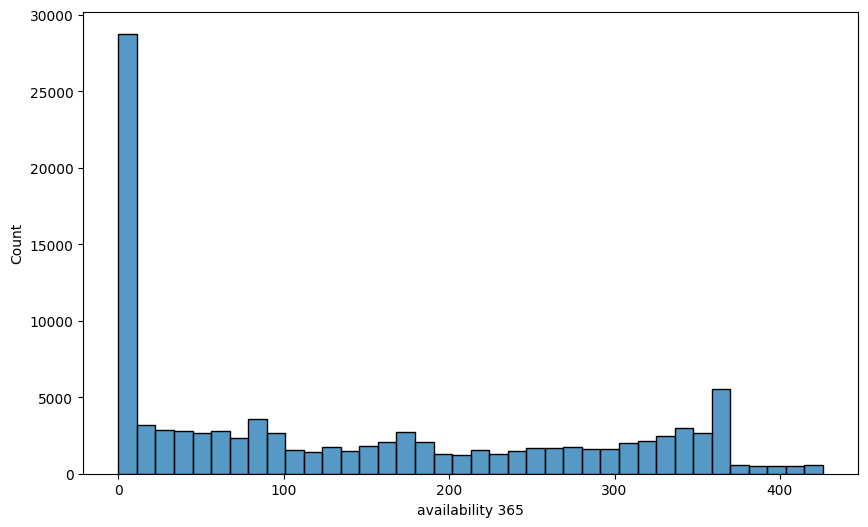

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability 365'])


Insight: The availability histogram shows two distinct peaks. A large number of listings have very low availability (0-50 days), suggesting they are either frequently booked or only available for short periods. Another large group is available nearly year-round (300-365 days), which could indicate either lower demand or properties dedicated solely to Airbnb rentals.

## How do number of reviews vary across neighbourhood groups?

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['neighbourhood group'], y=df['number of reviews'])
plt.title('Number of Reviews by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

## What’s the relationship between reviews per month and room type?


Text(0, 0.5, 'Reviews per Month')

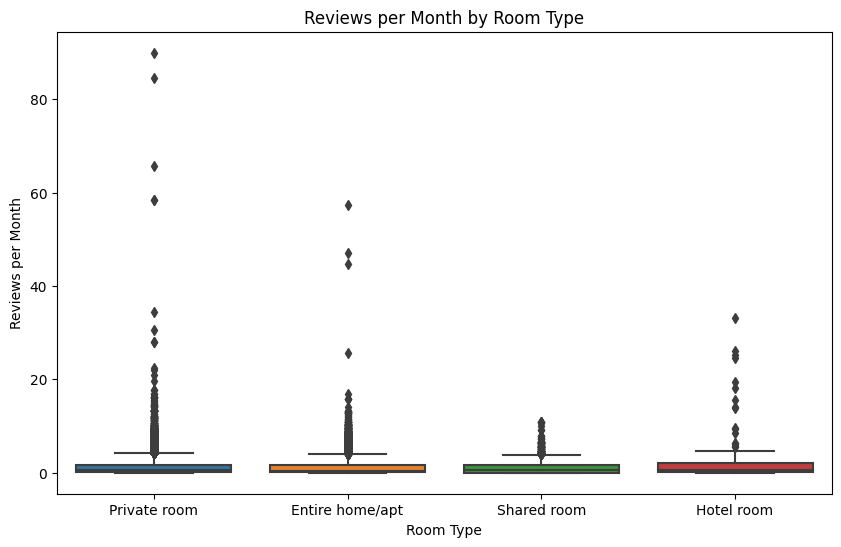

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['room type'], y=df['reviews per month'])
plt.title('Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Reviews per Month')

In [37]:
plt.figure(figsize=(16, 8))

sns.boxplot(
    x='neighbourhood group',
    y='price',
    hue='room type',
    data=df
)

plt.title('Price Distribution by Neighbourhood and Room Type', fontsize=16)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price ($)')
plt.legend(title='Room Type')
plt.ylim(0, 1000)

plt.show()

Insight: Manhattan and Brooklyn, being the largest markets, also have the widest range in the number of reviews. However, the median number of reviews is low across all boroughs, suggesting many listings have few reviews. The box plot for reviews per month shows that "Entire home/apt" listings tend to get slightly more reviews per month than "Private rooms", likely due to higher booking frequency.

# Host & Listings

## Do verified hosts charge higher prices?

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['host_identity_verified'], y=df['price'])
plt.title('Price by Host Identity Verified')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

Insight: There is no significant difference in the price distribution between verified and unverified hosts. This suggests that, from a pricing perspective, verification status is not a major factor for hosts.

## How many listings do hosts usually have?


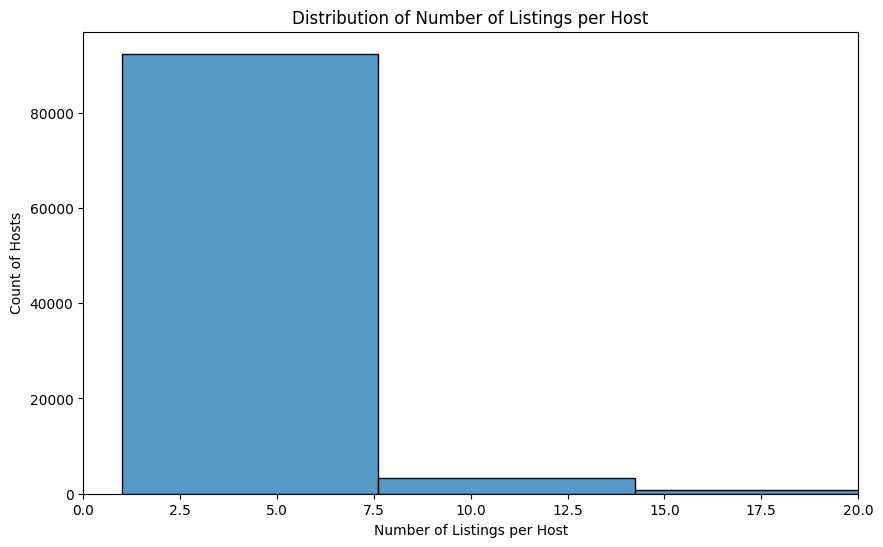

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df["calculated host listings count"], bins=50, kde=False)
plt.title("Distribution of Number of Listings per Host")
plt.xlabel("Number of Listings per Host")
plt.ylabel("Count of Hosts")
plt.xlim(0, 20)
plt.show()


## Are there super-hosts with very high listing counts?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

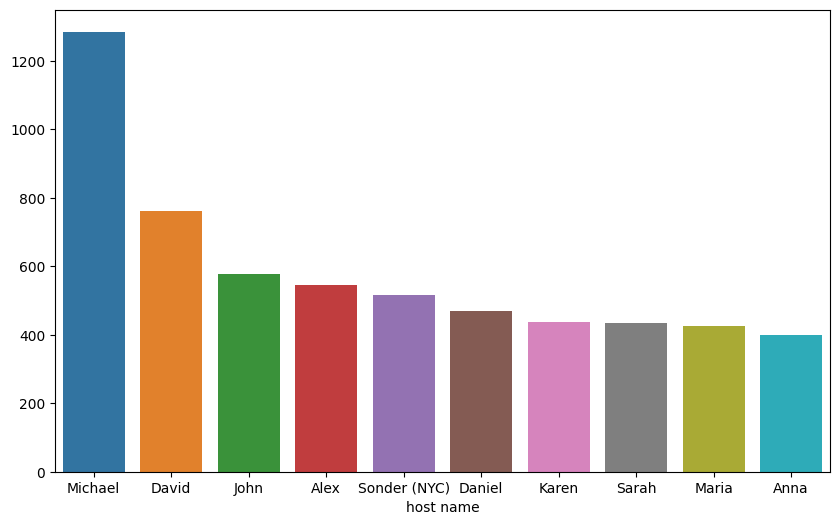

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['host name'].value_counts().head(10).index,y=df['host name'].value_counts().head(10).values)
plt

Insight: The market is dominated by casual hosts. The vast majority of hosts manage only one or two properties. However, a small number of professional "super-hosts" like Sonder, Blueground, and Michael manage hundreds of listings, indicating a small but significant business-oriented segment of the market.

# Geospatial Analysis

## How are listings distributed on the map of NYC?

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

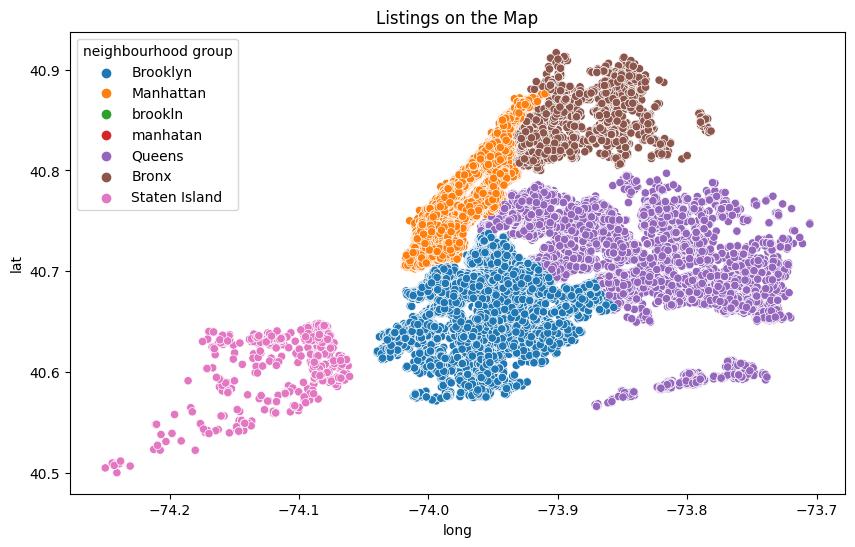

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['neighbourhood group'])
plt.title('Listings on the Map')
plt

## Do certain areas have clusters of high prices?

In [42]:
import plotly.express as px

fig = px.scatter_geo(
    df,
    lon="long",
    lat="lat",
    color="price",  # color by host listing count
    hover_name="neighbourhood",              # show neighbourhood on hover
    size_max=10,
    projection="natural earth",
    title="Airbnb Listings Distribution on Globe"
)

fig.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

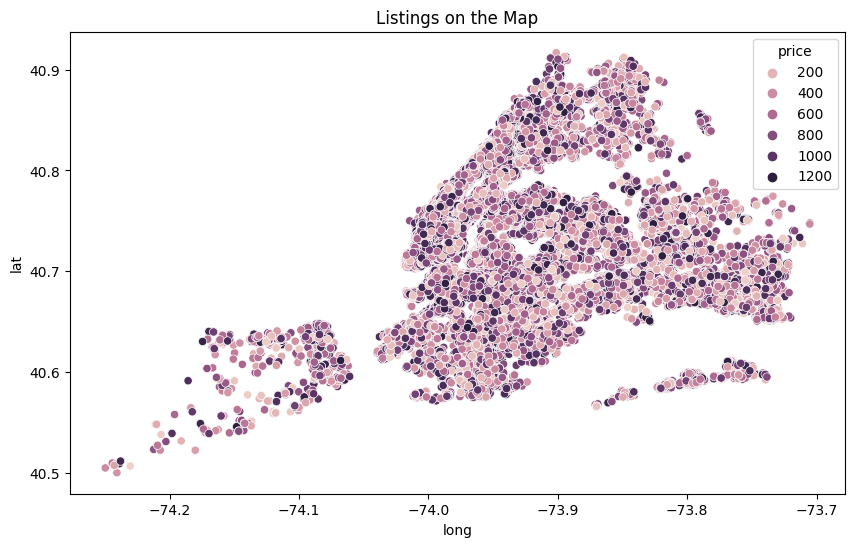

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'])
plt.title('Listings on the Map')
plt

Insight: The scatter plot of listings confirms the density in Manhattan and Brooklyn. When colored by neighborhood group, it provides a clear visual demarcation of the boroughs. This map is crucial for understanding the physical layout and concentration of the market.

#Time-Based Trends

How has last review date evolved over time?

📊 Time series line chart of number of reviews per month/year.

Are newer construction years associated with higher prices?

📊 Scatter plot (Construction year vs price).

# How has last review date evolved over time?

In [44]:
import datetime
from datetime import datetime

In [45]:
current_year = datetime.now().year
future_dates_count = df[df['last review'].dt.year > current_year].shape[0]
df.loc[df['last review'].dt.year > current_year, 'last review'] = pd.NaT
max_date = df['last review'].max()

In [46]:
df['last review'] = pd.to_datetime(df['last review'])
df['year'] = df['last review'].dt.year
df['month'] = df['last review'].dt.month
df['day'] = df['last review'].dt.day

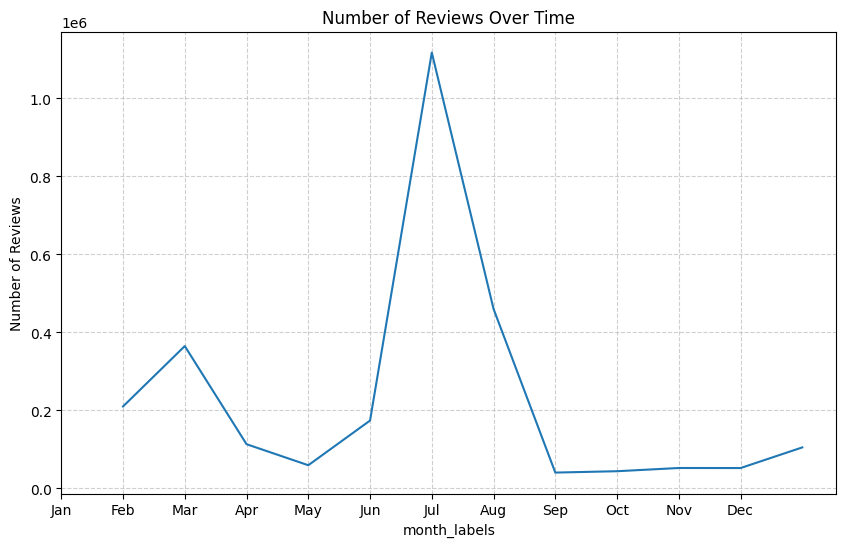

In [47]:
monthly_reviews = df.groupby('month')['number of reviews'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_reviews['month'], y=monthly_reviews['number of reviews'])
plt.title('Number of Reviews Over Time')
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_labels)
plt.xlabel('month_labels')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.6)


Insight:A monthly analysis of reviews reveals a distinct seasonal trend in booking activity, directly reflecting the city's tourism cycles. The peak season, with the highest number of reviews, occurs in the summer (June-August) and again in late autumn. Conversely, the winter months, especially January and February, represent the clear off-season with the lowest activity.

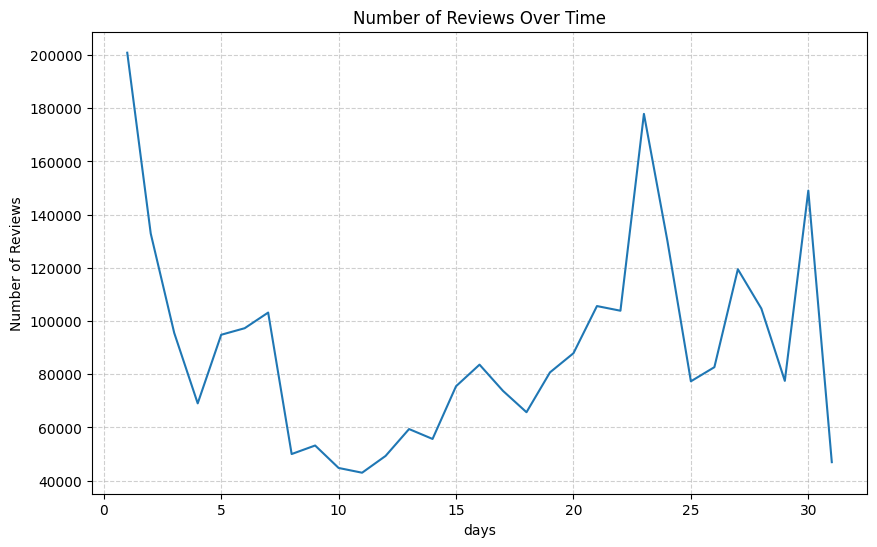

In [48]:
daily_reviews = df.groupby('day')['number of reviews'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_reviews ['day'], y=daily_reviews ['number of reviews'])
plt.title('Number of Reviews Over Time')
plt.xlabel('days')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.6)


In [49]:
yearly_reviews = df.groupby('year')['number of reviews'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_reviews ['year'], y=yearly_reviews ['number of reviews'])
plt.title('Number of Reviews Over Time')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.6)


Insight:the time-based graphs show review activity grew steadily until 2019, dropped sharply in 2020

## Are newer construction years associated with higher prices?

Text(0, 0.5, 'Price')

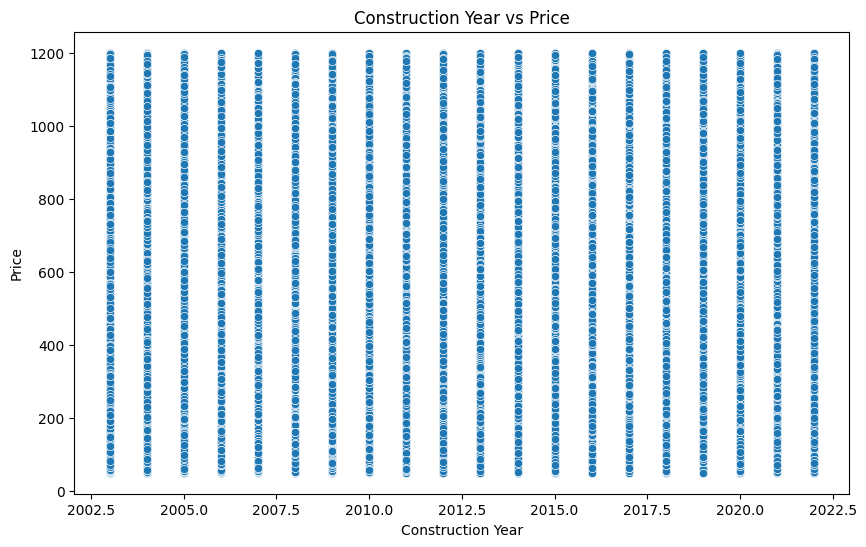

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Construction year'], y=df['price'])
plt.title('Construction Year vs Price')
plt.xlabel('Construction Year')
plt.ylabel('Price')

In [51]:
correlation_matrix = df.select_dtypes(include=['number']).corr()


In [52]:

plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Conclusion

This comprehensive analysis reveals a mature and highly concentrated Airbnb market, primarily dominated by Manhattan and Brooklyn. These two boroughs command the highest listing prices and density, establishing a clear market hierarchy. The most significant drivers of price are location and room type, with an "Entire home/apt" carrying a substantial premium over other options.

The host landscape consists mainly of casual individuals managing a single property, yet a small number of professional "super-hosts" control a disproportionately large inventory. Seasonality is a major factor, with booking activity peaking in the summer and autumn months, presenting a clear opportunity for hosts to implement dynamic pricing.

Crucially, the analysis shows no correlation between a high price and a high review score, indicating that guest satisfaction is driven by value rather than cost. The market is resilient, having rebounded from a sharp dip in 2020, and continues to be a competitive environment for hosts.